# **Task 1– K-Means Clustering**

In [23]:
#import python libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [24]:
#load the dataset using pandas and display the first 05 rows
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print("First 05 rows: ")
print(df.head())

First 05 rows: 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [25]:
#Select relevant features for clustering
features = df[['sepal length (cm)','sepal width (cm)']]

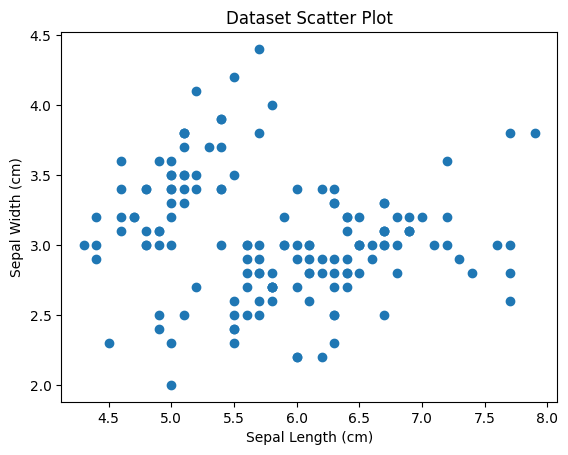

In [26]:
#Visualise the dataset using a scatter plot
plt.scatter(features['sepal length (cm)'],features['sepal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Dataset Scatter Plot')
plt.show()

In [27]:
#Training the model on the 'features' under 03 clusters
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(features)

KMeans(n_clusters=2, random_state=42)

In [28]:
#Retrieve the cluster labels infront of 05 rows
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [29]:
#Adding cluster labels as a new columns to the dataset
df['cluster'] = labels
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


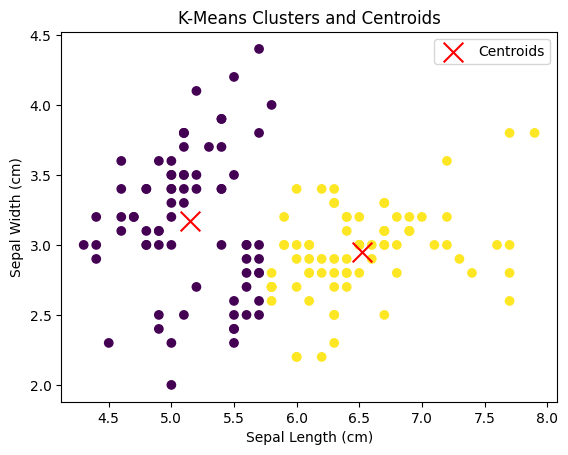

In [30]:
#Visualising the clusters and their centroids
plt.scatter (features['sepal length (cm)'], features['sepal width (cm)'], c=labels, cmap='viridis')

#Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='red', label='Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clusters and Centroids')
plt.legend()
plt.show()

In [31]:
#Calculate the WCSS(Within-Cluster Sum of Squares)
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)

print(wcss)

[130.4752666666667, 58.44759246088194, 37.0507021276596, 28.41365317351379, 26.9325075582776, 17.463509575220108, 14.828543464836567, 12.843135057471263, 12.530893304970899, 9.854376984126986]


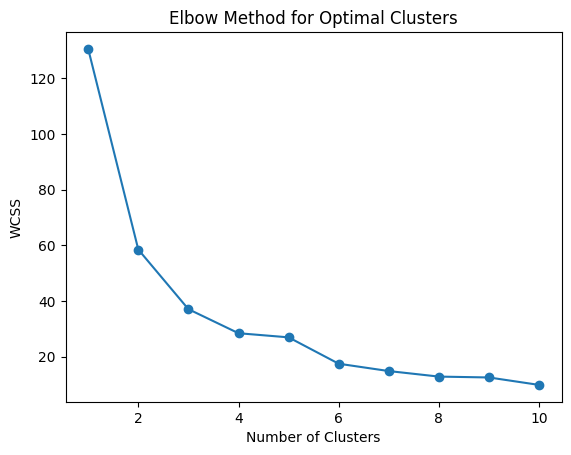

In [32]:
#Using the Elbow method to find the optiomum no. of clusters
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [33]:
#RE-train the the K-Means model with the optimal number of clusters
optimal_k = 3

kmeans_optimal = KMeans(n_clusters=optimal_k,random_state=42)
kmeans_optimal.fit(features)

labels_optimal = kmeans_optimal.labels_
df['optimal_cluster'] = labels_optimal

In [34]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  optimal_cluster  
0        0                2  
1        0                2  
2        0                2  
3        0                2  
4        0                2  


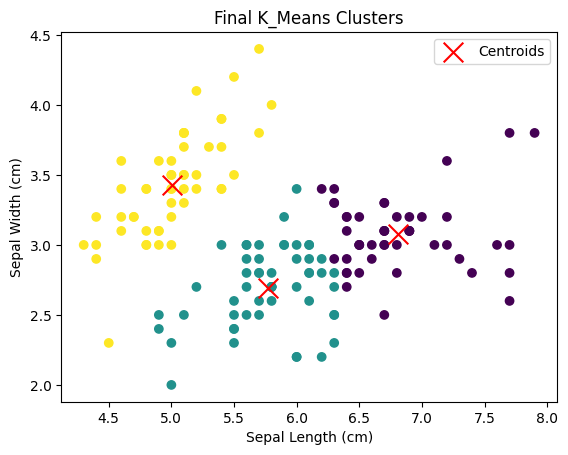

In [35]:
#Plotting the graph for the optimal no. of clusters
plt.scatter (features['sepal length (cm)'], features['sepal width (cm)'], c=labels_optimal, cmap='viridis')

#Plot the optimal centroids
centroids_optimal = kmeans_optimal.cluster_centers_
plt.scatter(centroids_optimal[:,0], centroids_optimal[:,1], marker='x', s=200, c='red', label='Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'Final K_Means Clusters')
plt.legend()
plt.show()

# **Task 2– Hierarchical Clustering**

In [36]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

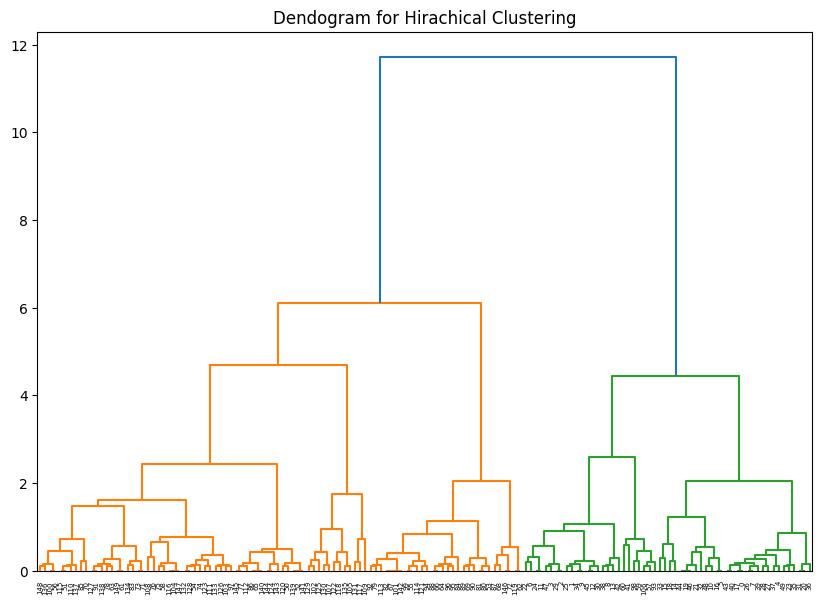

In [37]:
#Visualise hierarchical clustering
linked = linkage(features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.title('Dendogram for Hierarchical Clustering')
plt.show()

In [38]:
#Perform Agglomerative Hierarchical Clustering
hc=AgglomerativeClustering(n_clusters=3,linkage='ward')
hc.fit(features)

AgglomerativeClustering(n_clusters=3)

In [39]:
hc_labels = hc.labels_

In [40]:
df['hierarchical_cluster'] = hc_labels
print("Hierarchical Clustering Labels: ", hc_labels)

Hierarchical Clustering Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 2 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 1 2 2 2 0 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


In [41]:
print(df.tail())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     cluster  optimal_cluster  hierarchical_cluster  
145        1                0                     0  
146        1                1                     2  
147        1                0                     0  
148        1                0                     0  
149        1                1                     0  


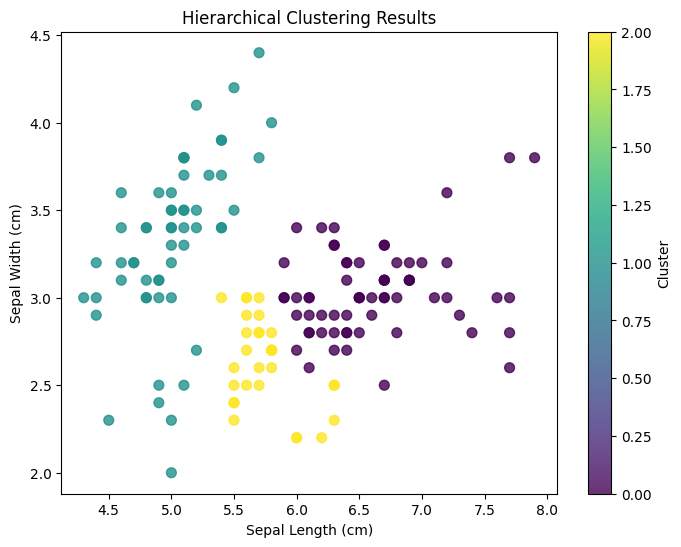

In [42]:
#Visualise hierarchical clustering
plt.figure(figsize=(8,6))
plt.scatter(features['sepal length (cm)'], features['sepal width (cm)'],
              c=hc_labels, cmap='viridis', s=50, alpha=0.8)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Hierarchical Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

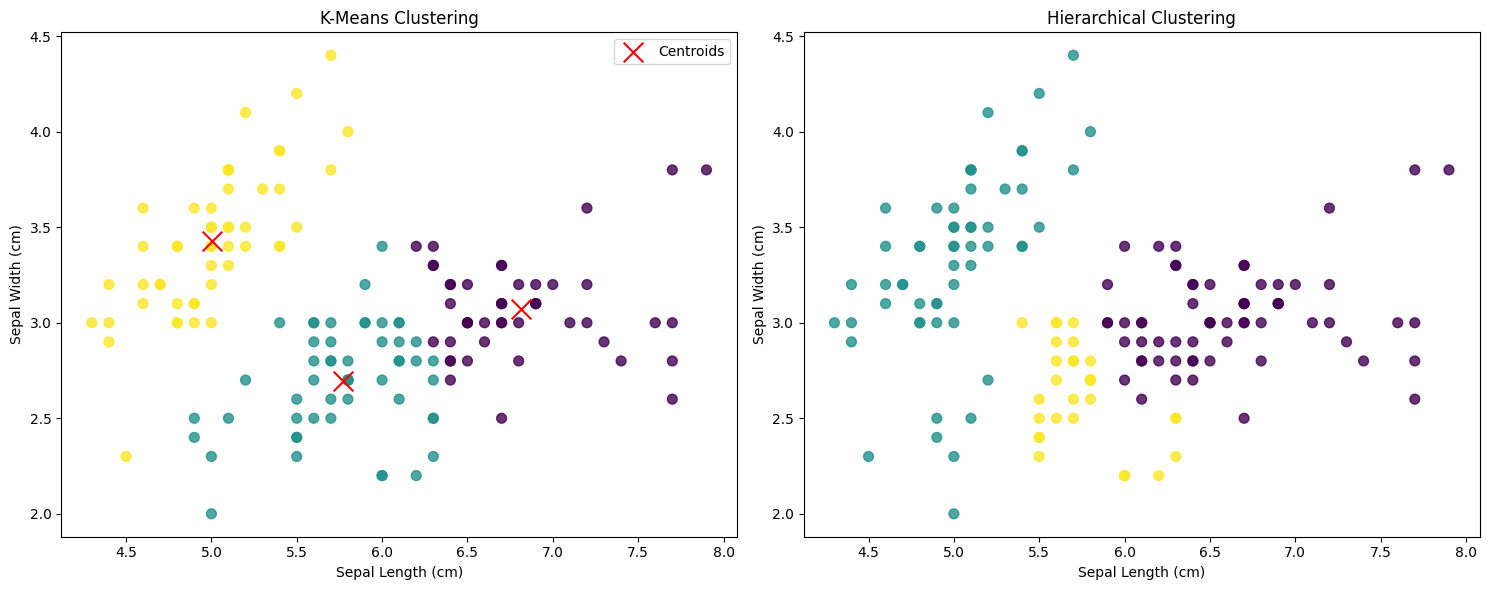

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(features['sepal length (cm)'], features['sepal width (cm)'],
            c=labels_optimal, cmap='viridis', s=50, alpha=0.8)
ax1.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], marker='x',
            s=200, c='red', label='Centroids')
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_title('K-Means Clustering')
ax1.legend()

ax2.scatter(features['sepal length (cm)'], features['sepal width (cm)'],
              c=hc_labels, cmap='viridis', s=50, alpha=0.8)
ax2.set_xlabel('Sepal Length (cm)')
ax2.set_ylabel('Sepal Width (cm)')
ax2.set_title('Hierarchical Clustering')

plt.tight_layout()
plt.show()

*   The no. of outliers in the K-Means clustering is higher than the no. of outliers in the Hierarchical Clustering method
*   The decision boundary in the Hierarchical Clustering is smoother than the K-Means Clustering method.

